In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plot_settings
import h5py

### Load and plot data

In [2]:
file_path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\AstroGW\GW-signals\H-H1_LOSC_4_V1-1126259446-32.hdf5"
data = h5py.File(file_path, 'r')

In [3]:
h = data['strain']['Strain'][:]

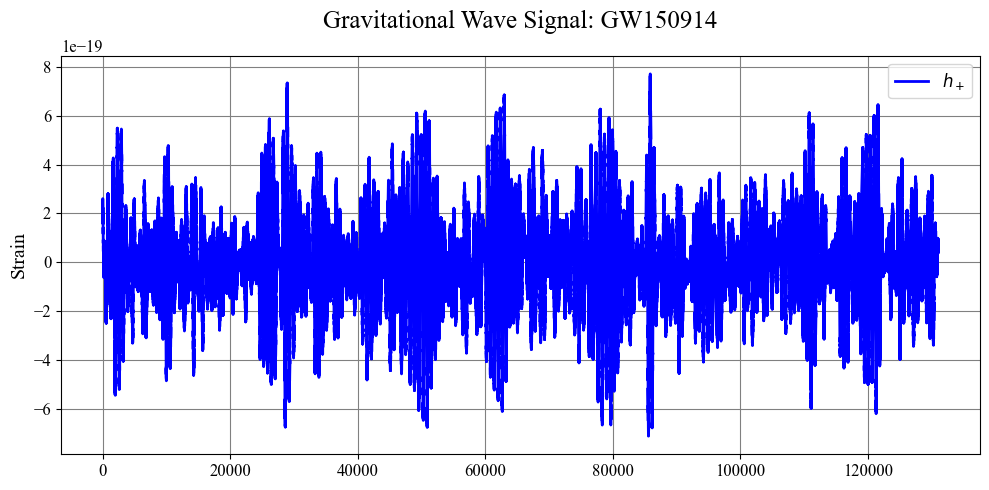

In [4]:
plt.plot(h, label=r'$h_+$', color='blue')
plt.ylabel('Strain')
plt.title('Gravitational Wave Signal: GW150914')
plt.legend()

Obviuosly the output is dominated by noise.\
Supposing:
1. there is indeed a signal in our detector output
2. The signal is ergodic
3. The noise is stationary 

We can compute the Wiener optimal filter as the following: 
## $ \overline{K} = 2 \mathcal{c} \frac{|\overline{h}(\nu)|^{2}}{\mathcal{S}_n(\nu)}$

First we compute the noise PSD.

In [5]:
from matplotlib import mlab 
from scipy.interpolate import interp1d

In [12]:
NFFT = 4096
fs   = 4096
fmin = 10
fmax = 2000
Pxx_H1, freqs = mlab.psd(h[int(1e5):], Fs = fs, NFFT = NFFT)

Text(0.5, 1.0, 'Advanced LIGO strain data')

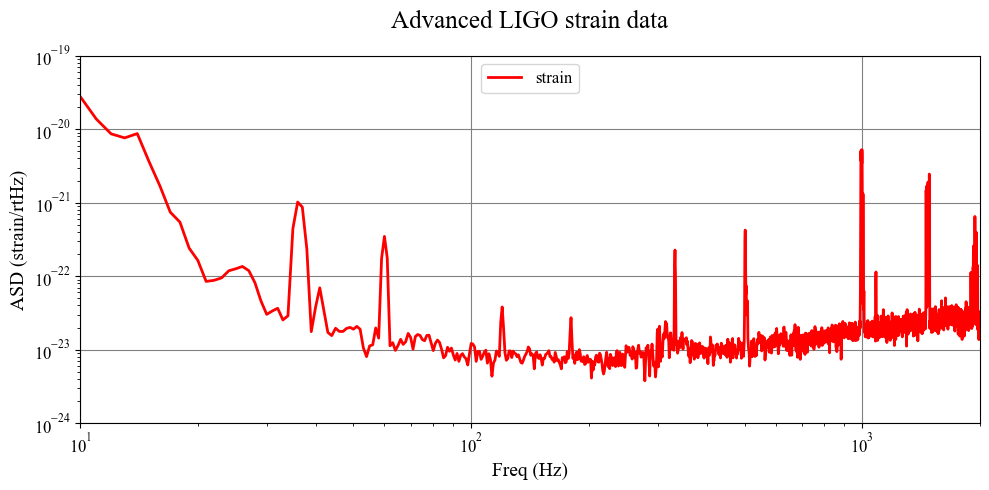

In [13]:
plt.figure()
plt.loglog(freqs, np.sqrt(Pxx_H1),'r',label='strain')
plt.axis([fmin, fmax, 1e-24, 1e-19])
plt.ylabel('ASD (strain/rtHz)')
plt.xlabel('Freq (Hz)')
plt.legend(loc='upper center')
plt.title('Advanced LIGO strain data')

In [14]:
# Compute FFT of the strain data (real FFT)
hhat = np.fft.rfft(h)

# Frequencies corresponding to rfft
fft_freqs = np.fft.rfftfreq(len(h), d=1/fs)

# Interpolate the PSD to match the FFT frequency bins
Pxx_interp = np.interp(fft_freqs, freqs, Pxx_H1)

# Frequency-domain filtering
K_hat = hhat / Pxx_interp

# Transform back to time domain
K = np.fft.irfft(K_hat)

In [15]:
S_hat = 1j * 2 * np.pi * fft_freqs * K_hat
S = np.fft.irfft(S_hat)

(-2.0000000000000002e+29, 2.0000000000000002e+29)

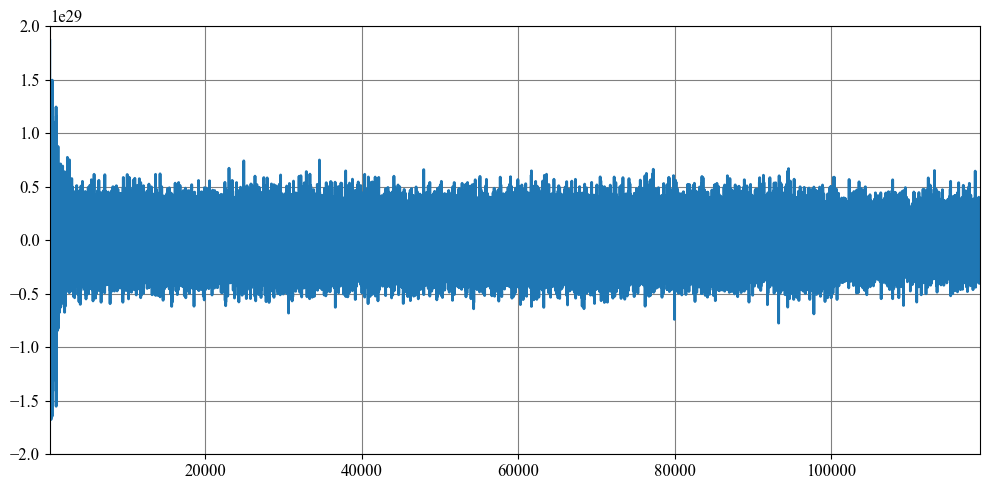

In [16]:
plt.plot(S)
plt.xlim(100,119000)
plt.ylim(-0.2*1e30,0.2*1e30)